<a href="https://colab.research.google.com/github/kelvinfoo123/Final-Year-Project/blob/main/Mapper_graph_of_neural_network_for_classification_of_Covid_19_drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load and Clean Data**

In [1]:
import numpy as np 
import pandas as pd 

drug = pd.read_csv("COVID_DRUGS.csv")
drug.head()

,CID,SMILES,MolecularFormula,MolecularWeight,InChI,InChIKey,IUPACName,XLogP,ExactMass,MonoisotopicMass,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
0,2744814,ClC1=CC(NC(=O)CSC2=NC=CC(=N2)C2=CSC(=N2)C2=CC=...,C21H14Cl2N4OS2,473.4,InChI=1S/C21H14Cl2N4OS2/c22-14-8-15(23)10-16(9...,LILOEJREEQFTPM-UHFFFAOYSA-N,"N-(3,5-dichlorophenyl)-2-[4-(2-phenyl-1,3-thia...",5.6,471.998609,471.998609,...,3.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-0.477121255
1,2821293,CN1N=C(C=C1C(F)(F)F)C1=CC=C(S1)C1=CC=NC(SCC(=O...,C21H15ClF3N5OS2,510.0,"InChI=1S/C21H15ClF3N5OS2/c1-30-18(21(23,24)25)...",AWQBIBTZJKFLEW-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[5-[1-methyl-5-(triflu...,4.9,509.035865,509.035865,...,3.0,1.0,0.0,1.0,4.0,0.0,1.2,8.0,10.0,-1
2,2820912,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,WRXXISITJDZVCL-UHFFFAOYSA-N,N-(4-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.0,8.0,10.0,-1.041392685
3,2820914,CSC1=C(C(C)=C(S1)C1=NC(C)=CS1)C1=CC=NC(SCC(=O)...,C22H19ClN4OS4,519.1,InChI=1S/C22H19ClN4OS4/c1-12-10-30-20(25-12)19...,NNVVKOVHRSDRSQ-UHFFFAOYSA-N,N-(2-chlorophenyl)-2-[4-[4-methyl-2-methylsulf...,6.3,518.013024,518.013024,...,3.0,1.0,0.0,1.0,4.0,1.0,1.2,8.0,10.0,BLINDED
4,2744846,CC1=NC(=CS1)C1=NC(=CS1)C1=NC(SCC(=O)NC2=CC=C(C...,C19H14ClN5OS3,460.0,InChI=1S/C19H14ClN5OS3/c1-11-22-16(9-27-11)18-...,JEZYTEDGOJCVQS-UHFFFAOYSA-N,"N-(4-chlorophenyl)-2-[4-[2-(2-methyl-1,3-thiaz...",4.4,459.004901,459.004901,...,4.0,1.0,0.0,1.0,4.0,0.0,1.0,7.0,10.0,-1.146128036


In [2]:
drug = drug.dropna()

In [ ]:
drug.shape

(100, 40)

In [3]:
# Scale the data 
from sklearn.preprocessing import MinMaxScaler

def min_max(df):
    min_max_scaler = MinMaxScaler(feature_range=(0,1))
    df_scaled = min_max_scaler.fit_transform(df[[item for item in df.columns]])
    df_scaled= pd.DataFrame(df_scaled)
    df = df.mask(df==0).fillna(method='backfill')
    return df

In [4]:
drug = drug.drop(columns=['CID', 	'SMILES', 	'MolecularFormula', 'InChI', 	'InChIKey', 	'IUPACName'])

## **Training and Testing Set**

In [5]:
#train values
clean = drug[drug['pIC50'] != 'BLINDED']
clean['pIC50'] = clean['pIC50'].astype('float')
clean = clean.dropna()
clean = clean.reset_index(drop=True)

# Prediction 
predict = drug[drug['pIC50'] == 'BLINDED'] # We don't know the actual value of pIC50

<ipython-input-5-132128bef1a4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['pIC50'] = clean['pIC50'].astype('float')


In [6]:
from sklearn.model_selection import train_test_split 

df = clean 
X = df.drop(columns = 'pIC50')
y = df['pIC50']
y = pd.cut(y, bins=[-3.0,  0.0, 1.5], labels=[0, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

## **Building Neural Networks**

In [7]:
input_dim = len(clean.drop(columns = 'pIC50').columns)

In [8]:
import keras 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras import regularizers

In [9]:
model = Sequential()
model.add(Dense(50, activation='relu', kernel_initializer='random_normal',
                kernel_regularizer=regularizers.l2(0.05), input_dim = input_dim))
model.add(Dense(40, activation='relu', kernel_initializer='random_normal',
                kernel_regularizer=regularizers.l2(0.05)))         
model.add(Dense(20, activation='relu', kernel_initializer='random_normal',
                kernel_regularizer=regularizers.l2(0.05)))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal',
                kernel_regularizer=regularizers.l2(0.05)))

In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

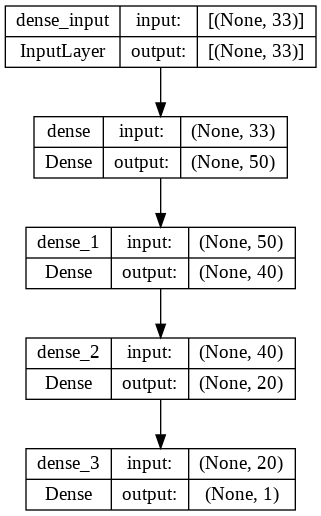

In [12]:
from keras.utils.vis_utils import plot_model 

plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1700      
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 10, shuffle = True, verbose = 2, validation_data = (X_test, y_test))

Epoch 1/100
6/6 - 3s - loss: 0.8783 - accuracy: 0.9167 - val_loss: 1.1615 - val_accuracy: 0.7097 - 3s/epoch - 491ms/step
Epoch 2/100
6/6 - 0s - loss: 0.6625 - accuracy: 0.9167 - val_loss: 1.2802 - val_accuracy: 0.7097 - 42ms/epoch - 7ms/step
Epoch 3/100
6/6 - 0s - loss: 0.6253 - accuracy: 0.9167 - val_loss: 1.2748 - val_accuracy: 0.7097 - 46ms/epoch - 8ms/step
Epoch 4/100
6/6 - 0s - loss: 0.5688 - accuracy: 0.9167 - val_loss: 1.1567 - val_accuracy: 0.7097 - 40ms/epoch - 7ms/step
Epoch 5/100
6/6 - 0s - loss: 0.5241 - accuracy: 0.9167 - val_loss: 0.9584 - val_accuracy: 0.7097 - 40ms/epoch - 7ms/step
Epoch 6/100
6/6 - 0s - loss: 0.4743 - accuracy: 0.9167 - val_loss: 0.9118 - val_accuracy: 0.7097 - 39ms/epoch - 6ms/step
Epoch 7/100
6/6 - 0s - loss: 0.4441 - accuracy: 0.9167 - val_loss: 0.8880 - val_accuracy: 0.7097 - 52ms/epoch - 9ms/step
Epoch 8/100
6/6 - 0s - loss: 0.4164 - accuracy: 0.9167 - val_loss: 0.9224 - val_accuracy: 0.7097 - 40ms/epoch - 7ms/step
Epoch 9/100
6/6 - 0s - loss: 0.3

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.figure_factory as ff

dH = pd.DataFrame(history.history)
fig = go.Figure()

fig.add_trace(go.Scatter(x=dH.index, y=dH['loss'],
                    mode='lines',
                    name='Training loss',
                    line_color='red'))
fig.add_trace(go.Scatter(x=dH.index, y=dH['val_loss'],
                    mode='lines',
                    name='Validation loss',
                    line_color='orange'))
fig.update_layout(
    title="Accuracy and Loss",
    xaxis_title="Number of epochs")
fig.update_layout({'plot_bgcolor': 'aliceblue' , #or azure
'paper_bgcolor': 'white',}, template='plotly_white')

1/1 [==============================] - 1s 627ms/step


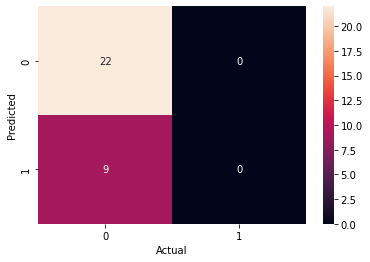

In [ ]:
y_pred = model.predict(X_test) 
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix 
import seaborn as sns 
import matplotlib.pyplot as plt 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

## **Visualizing Weights**

In [ ]:
from keras.models import Model
data = clean.drop(columns=['pIC50'])

layer_name_0 = 'dense'
layer_name_1 = 'dense_1'
layer_name_2 = 'dense_2'
layer_name_3 = 'dense_3'

In [ ]:
intermediate_layer_model_0 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_0).output)
intermediate_layer_model_1 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_1).output)
intermediate_layer_model_2 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_2).output)
intermediate_layer_model_3 = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name_3).output)

intermediate_output_0 = intermediate_layer_model_0.predict(data)
intermediate_output_1 = intermediate_layer_model_1.predict(data)
intermediate_output_2 = intermediate_layer_model_2.predict(data)
intermediate_output_3 = intermediate_layer_model_3.predict(data)

3/3 [==============================] - 0s 6ms/step


3/3 [==============================] - 0s 7ms/step


## **Mapper Algorithm**

In [ ]:
!pip install giotto-tda

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 20.8 MB/s 
     |████████████████████████████████| 3.3 MB 41.1 MB/s 
     |████████████████████████████████| 452 kB 50.2 MB/s 
     |████████████████████████████████| 526 kB 55.5 MB/s 
     |████████████████████████████████| 1.6 MB 41.0 MB/s 


In [ ]:
import gtda.graphs as gr
from gtda.pipeline import Pipeline
from gtda.plotting import plot_point_cloud, plot_heatmap
from gtda.graphs import KNeighborsGraph, GraphGeodesicDistance
from gtda.mapper import (
    CubicalCover,
    OneDimensionalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph)
from gtda.mapper import Eccentricity, Entropy
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA

In [ ]:
filter_func = Eccentricity(metric = 'euclidean')
cover = CubicalCover(n_intervals = 20, overlap_frac = 0.5)
clusterer = DBSCAN(eps = 8, min_samples = 2, metric = 'euclidean') 
pipe_mapper = make_mapper_pipeline(filter_func = filter_func, cover = cover, clusterer = clusterer, verbose = False, n_jobs = 1)

**Mapper for original data set**

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               X, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

**Mapper for first dense layer**

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_0, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

In [ ]:
graph = pipe_mapper.fit_transform(intermediate_output_0)

node_id = 29 
node_elements = graph.vs["node_elements"]

# Node elements refer to the indices of the original data that belong to each node 
print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
""")


Node ID: 29
Node elements: [32 33 50 63]



In [ ]:
node_id = 32
print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
""")


Node ID: 32
Node elements: [50]



In [ ]:
clean.iloc[[50]]

,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
50,334.1,4.6,332.995948,332.995948,52.3,388.0,0.0,0.0,4.0,4.0,...,3.0,0.0,0.0,0.0,3.0,0.0,0.6,4.0,10.0,1.200659


In [ ]:
node_id = 28
print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
""")


Node ID: 28
Node elements: [32 33 48]



In [ ]:
clean.iloc[[32, 33, 48]]

,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
32,565.00,7.3,563.814325,561.817275,95.1,777.0,0.0,0.0,6.0,8.0,...,4.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,10.0,0.045757
33,284.72,1.5,284.013474,284.013474,120.0,378.0,0.0,2.0,6.0,2.0,...,2.0,2.0,0.0,1.0,2.0,0.0,0.6,2.0,2.0,-0.778151
48,334.40,3.9,334.055818,334.055818,132.0,409.0,0.0,1.0,6.0,4.0,...,3.0,1.0,1.0,1.0,3.0,0.0,0.8,5.0,10.0,-1.301030


In [ ]:
node_id = 24
print(f"""
Node ID: {node_id}
Node elements: {node_elements[node_id]}
""")


Node ID: 24
Node elements: [21 63]



In [ ]:
clean.iloc[[21, 63]]

,MolecularWeight,XLogP,ExactMass,MonoisotopicMass,TPSA,Complexity,Charge,HBondDonorCount,HBondAcceptorCount,RotatableBondCount,...,FeatureAcceptorCount3D,FeatureDonorCount3D,FeatureAnionCount3D,FeatureCationCount3D,FeatureRingCount3D,FeatureHydrophobeCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D,ConformerCount3D,pIC50
21,410.9,3.7,410.060425,410.060425,120.0,728.0,0.0,2.0,5.0,5.0,...,3.0,2.0,0.0,0.0,3.0,1.0,0.8,6.0,10.0,-2.477121
63,389.4,0.2,389.068156,389.068156,125.0,740.0,0.0,1.0,7.0,3.0,...,6.0,1.0,0.0,0.0,4.0,0.0,0.8,5.4,10.0,-1.003029


**Mapper for second dense layer**

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_1, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

**Mapper for third dense layer**

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_2, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})

**Mapper for final dense layer**

In [ ]:
plotly_params = {"node_trace": {"marker_colorscale": "RdBu"}}
fig = plot_static_mapper_graph(pipe_mapper,
                               intermediate_output_3, 
                               layout='fruchterman_reingold',
                               node_scale =20,
                               plotly_params=plotly_params)
fig.show(config={'scrollZoom': True})